In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [14]:
img1 = cv2.imread('1metre.jpg')
print(img.shape[:2])

(3024, 4032)


In [15]:
def show_image(image):
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(image)
    plt.show()

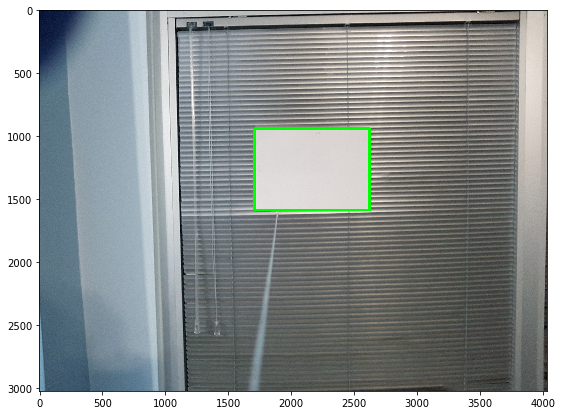

In [16]:
show_image(img)

In [17]:
def masking(img):
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    # change it according to your need !
    lower_white = np.array([75,6,200], dtype=np.uint8)
    upper_white = np.array([120,10,227], dtype=np.uint8)
    # Threshold the RGB image to get only white colors
    mask = cv2.inRange(hsv, lower_white, upper_white)
    return mask

img res:


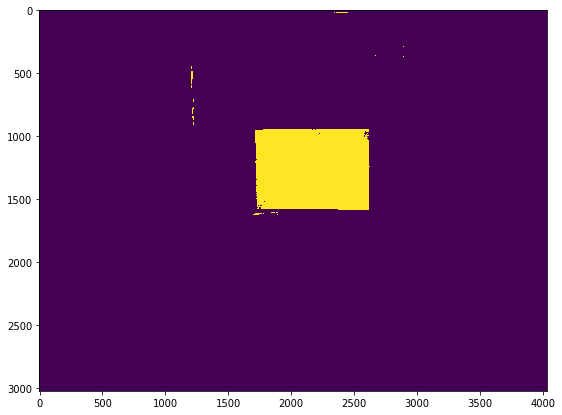

In [18]:
mask = masking(img1)
print("img res:")
show_image(mask)

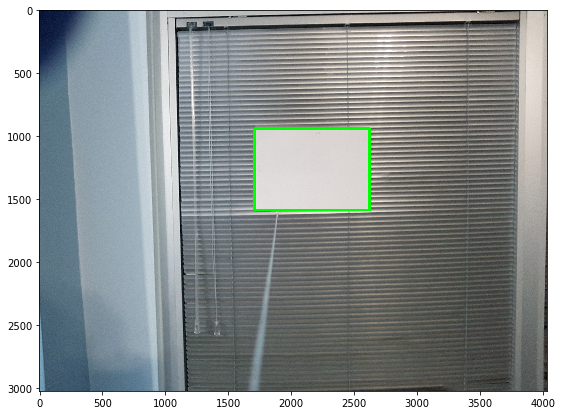

In [20]:
def find_rectangle(mask):
    ret, thresh = cv2.threshold(mask, 127, 255, 0)
    im2, contours, hierarchy = cv2.findContours(thresh, 1,2)

    c = max(contours, key = cv2.contourArea)

    x,y,w,h = cv2.boundingRect(c)
   
    return x,y,w,h

x1,y1,w1,h1 = find_rectangle(mask)
cv2.rectangle(img1,(x1,y1),(x1+w1,y1+h1),(0,255,0),20)
show_image(img)

Odak uzaklığının bulunması için kullanacağım benzerlik:</br>
Odak uzaklığı = (resme olan uzaklık) * (resmin pikseli) / (gerçek uzunluk)

In [23]:
f = 100 * h1 / 20
print(f)

3230.0


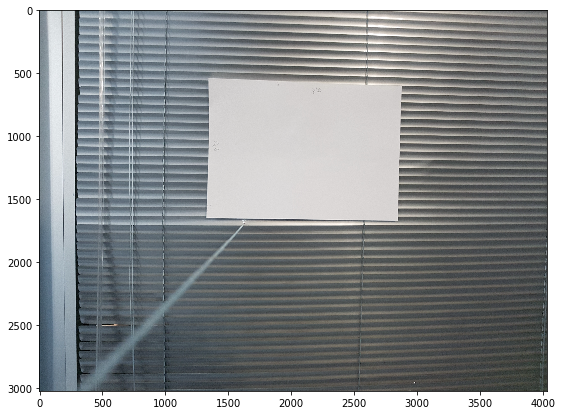

In [50]:
img2 = cv2.imread('60cm.jpg')
mask = masking(img2)
x2,y2,w2,h2 = find_rectangle(mask)
show_image(img2)

Yukarıdaki resmin kameraya olan uzaklığı 60 cmdir.

In [25]:
d = f*20 / h2
print(d)

58.14581458145815


In [46]:
def masking_sag(img):
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    # change it according to your need !
    lower_white = np.array([0,0,200], dtype=np.uint8)
    upper_white = np.array([150,15,215], dtype=np.uint8)
    # Threshold the RGB image to get only white colors
    mask = cv2.inRange(hsv, lower_white, upper_white)
    return mask

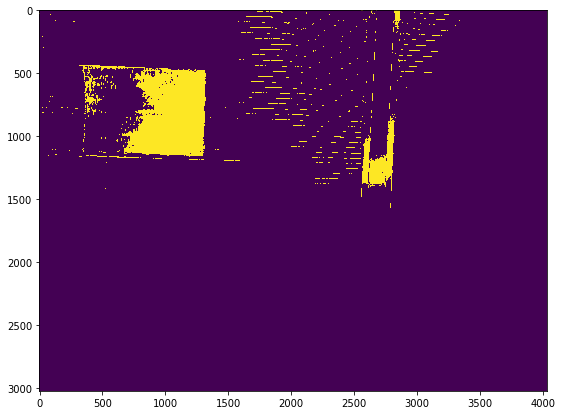

In [47]:
img3 = cv2.imread('25sag.jpg')
mask = masking_sag(img3)
show_image(mask)

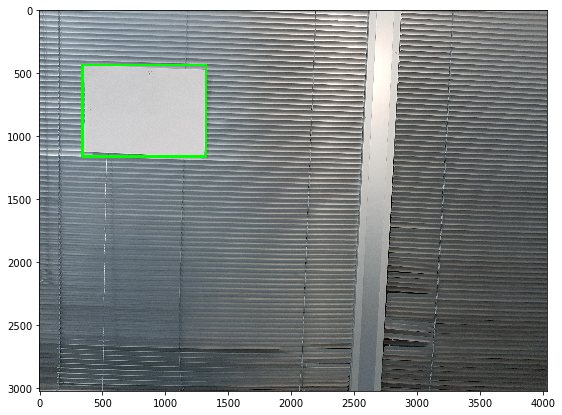

In [49]:
x3,y3,w3,h3 = find_rectangle(mask)
cv2.rectangle(img3,(x3,y3),(x3+w3,y3+h3),(0,255,0),20)
show_image(img3)